In [178]:

import pandas as pd

P = pd.read_csv("az_per_well-2.csv")
P = P.iloc[list(range(0,1208,4))]

D = P.select_dtypes(include=['float64'])

P['Numerical'] = pd.Categorical.from_array(P['Image_Metadata_Compound']).codes


array([27, 36, 35,  7, 19, 23, 37,  9, 31, 25, 23, 33,  1, 30, 30,  1,  3,
       31,  1,  8, 24, 28, 18,  8, 28,  2, 35, 16,  5,  7, 17,  4, 32, 15,
       37, 37,  1,  5,  2,  3,  1,  5, 28, 21, 31,  7, 24, 24,  6,  4, 10,
        2, 30, 18, 16,  5,  3, 19, 26, 33, 25,  2,  2, 22,  1, 37, 24, 16,
       34, 21, 22, 35,  4, 10, 15, 34, 12, 21, 36, 20,  1,  2,  6, 14, 18,
       31, 19, 37,  7, 36, 18, 12, 11,  7,  6,  5,  1, 34, 19,  6, 12, 31,
       32,  1,  2, 30, 30, 34, 12,  1, 15,  6, 23, 34,  8, 21, 26, 37,  7,
       36, 27, 32,  1,  5,  5, 23,  4, 25, 36, 37, 25, 33, 18, 37,  0, 20,
       37, 29, 26, 13, 31, 34,  6,  4,  0, 10,  2, 30, 36, 22,  5,  3, 26,
       21, 25, 20, 22, 13, 21,  1,  8,  5, 29, 23, 21, 37, 36, 23,  2, 21,
        9, 22,  2,  5, 21, 31, 29, 18, 11, 37, 21, 11, 32, 24,  4,  2,  1,
       35,  6,  5, 31,  1,  2,  6, 36, 30, 11,  6, 25, 26,  2, 37, 37, 35,
        1, 23, 19,  2,  8, 17,  9, 31, 25, 23,  1, 21,  3, 30, 26, 14,  0,
       31,  0, 24, 24, 23

In [163]:
# Log normalise data

from sklearn.decomposition import PCA
from scipy import stats
import numpy as np

Dlog = np.log(D.values)
Dz = stats.zscore(Dlog)


Dz = np.delete(Dz,np.where(np.isnan(Dz[0,:])),1)

#Principle component analysis

pca = PCA(n_components=3)
Dpc = pca.fit(Dz).transform(Dz)



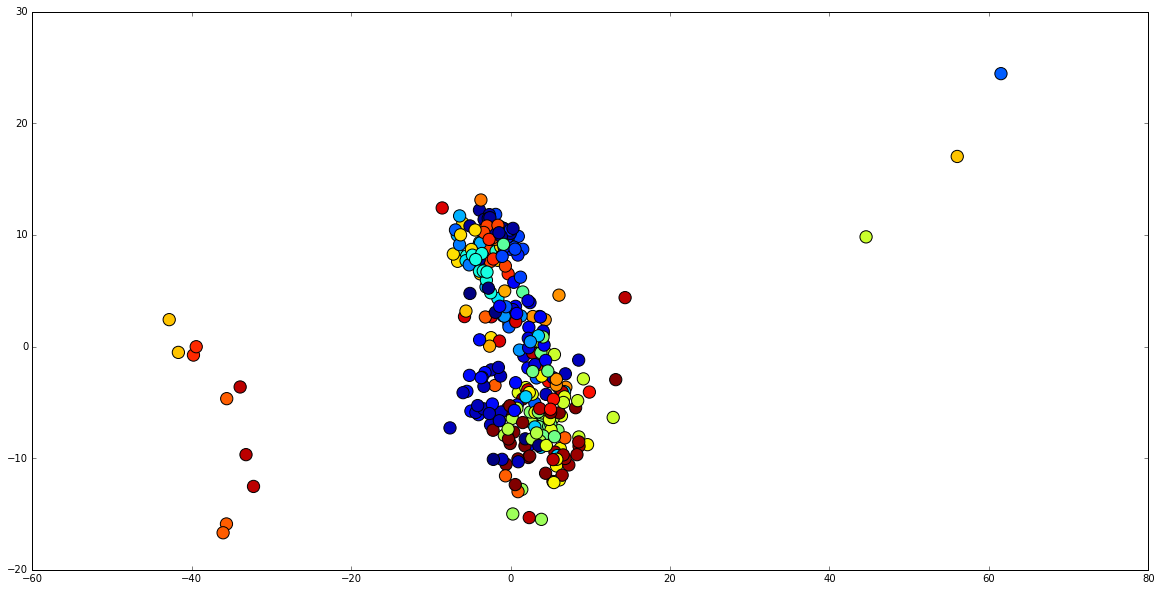

In [184]:

#Plot results


%matplotlib inline

import matplotlib.pyplot as plt

line = plt.figure()
plt.figure(figsize=(20,10))

plt.scatter(Dpc[:,0], Dpc[:,1], s=150, c = P['Numerical'].values)
